# Running IUPred on existing whole genome assemblies of Ashbya

Ameya sent AshbyaGenomesAnnotated.zip on Monday October 21st

* homolog_multiple_sequence_alignments : multiple sequence alignments  
* reference_genome_used : the reference files for Ashbya gossypii 
* genome_annotation_pipeline_filtered.txt : protein homologs in isolates from RNAseq 
* aa_composition_and_further_analysis.tsv : analysis of the homologous proteins


In [ ]:
import pandas as pd

aa_composition = pd.read_csv("aa_composition_and_further_analysis.tsv",sep="\t")

print("number of isolates:",aa_composition['isolate'].nunique())
print("core Ashbya genome:",aa_composition['Protein_ID'].nunique())

aa_composition.columns

# arginine-glycine or arginine-glycine-glycine (RG/RGG) : commonly found in RNA-binding proteins 

In [2]:
import sys 
sys.path.append('/Users/jasonmohabir/Documents/Duke/Rotation2_Gladfelter/aiupred')


In [ ]:
import aiupred_lib 

# Load the models and let AIUPred find if a GPU is available.     
embedding_model, regression_model, device = aiupred_lib.init_models()
# Predict disorder of a sequence
sequence = 'THISISATESTSEQENCE'
prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

393


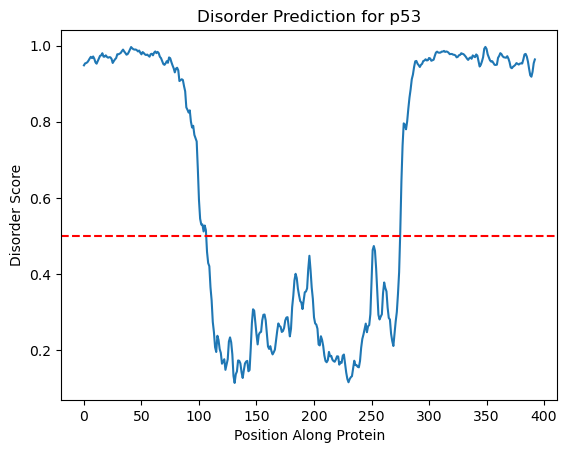

In [22]:
sequence = """MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP
DEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK
SVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE
RCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP
PGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG
GSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD""".split('\n')

sequence = ''.join(sequence)
print(len(sequence))

# Predict disorder of a sequence
prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

# https://www.uniprot.org/uniprotkb/P04637/entry
ax = pd.DataFrame(prediction).plot(xlabel='Position Along Protein',ylabel='Disorder Score',title='Disorder Prediction for p53',legend=False)
ax.axhline(y=0.5, color='r', linestyle='--')


In [ ]:
aa_composition['AIUPRED_score'] = aa_composition.Sequence.apply(lambda x: aiupred_lib.predict_disorder(x, embedding_model, regression_model, device))
aa_composition.to_csv("aa_composition_with_disorder_scores.tsv", sep="\t", index=False)

0        SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
1        SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
2        SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...
3        SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...
4        SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
                               ...                        
45375    DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...
45376    DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...
45377    DINNPVSSRTVHPSISEHAVTAAASGTLSSNPEYRVAPIVTPTLMS...
45378    DISKPVSSRPAHPSGSEYDANSDPSLKLSENSEYRVTPIVTPTLMS...
45379    DINNPVSSRTVHPSISEHAVTAAASGTLSSNPEYRVAPIVTPTLMS...
Name: Sequence, Length: 45380, dtype: object